In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Read the data set

In [42]:
df1 = pd.read_csv("cleaned_cardata.csv")

In [43]:
df1.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,6,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,7,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,3,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,9,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,6,4.60,6.87,42450,Diesel,Dealer,Manual,0


In DataPreparation code, we have already cleaned and prepare the dataset. 

#### **Univariate Analysis**

Let's take a look at the **Categorical Data**. 

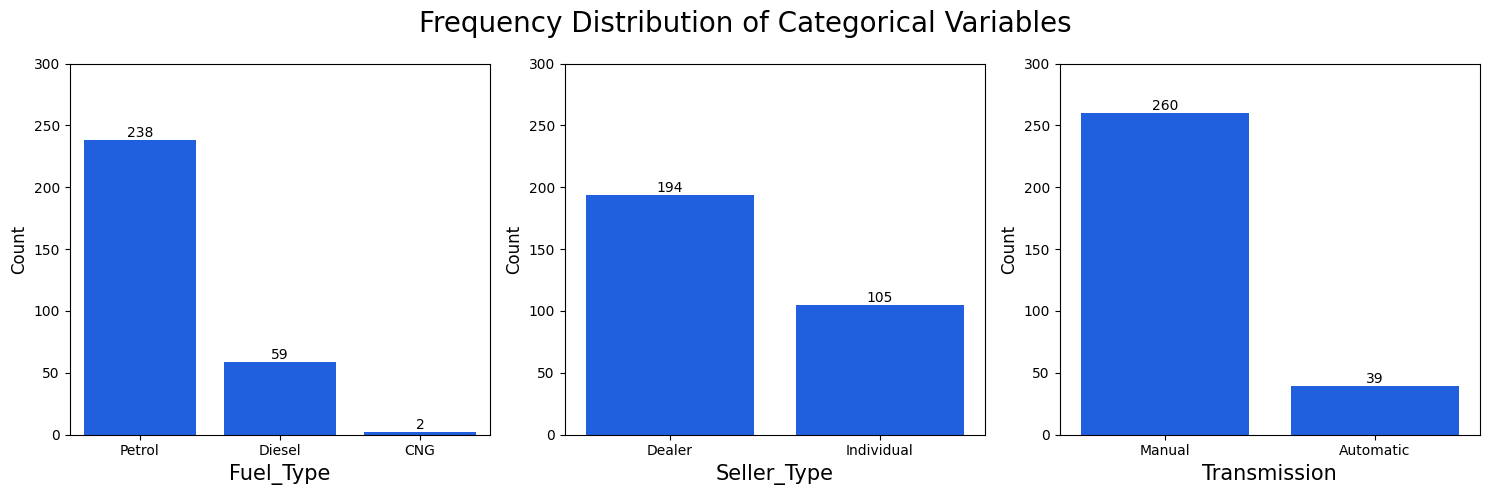

In [44]:
# Define the categorical columns
#CatCols = ['Fuel_Type', 'Seller_Type', 'Transmission']
CatCols = df1.select_dtypes(include=['object', 'category']).columns.tolist()

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100)

# Define custom colors
colors = ['#0055ff', '#ff7000', '#23bf00']
sns.set_palette(sns.color_palette(colors))

# Plot count plots for each categorical variable
for i, col in enumerate(CatCols):
    ax = axes[i]
    graph = sns.countplot(x=col, data=df1, ax=ax)
    ax.set_xlabel(col, fontsize=15)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_ylim([0, 300])
    
    # Add count labels on top of the bars
    for container in graph.containers:
        graph.bar_label(container)

# Set the super title for the entire figure
plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


##### **Target VS Categorical Features**

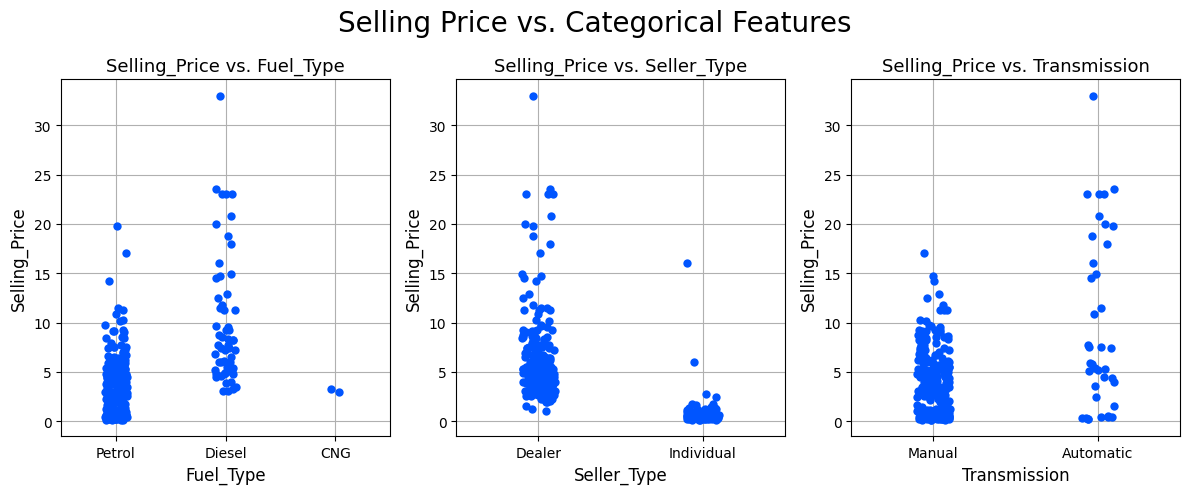

In [45]:
fig, axes = plt.subplots(nrows=1 ,ncols=3, figsize=(12,5), dpi=100)
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(CatCols)):
    sns.stripplot(ax=axes[i], x=CatCols[i], y=target, data=df1, size=6, color=c)
    axes[i].set_title('{} vs. {}'.format(target, CatCols[i]), size = 13)
    axes[i].set_xlabel(CatCols[i], size = 12)
    axes[i].set_ylabel(target, size = 12)
    axes[i].grid()

plt.suptitle('Selling Price vs. Categorical Features', size = 20)
plt.tight_layout()
plt.show()

Let's take a look at **Numerical Variables**.

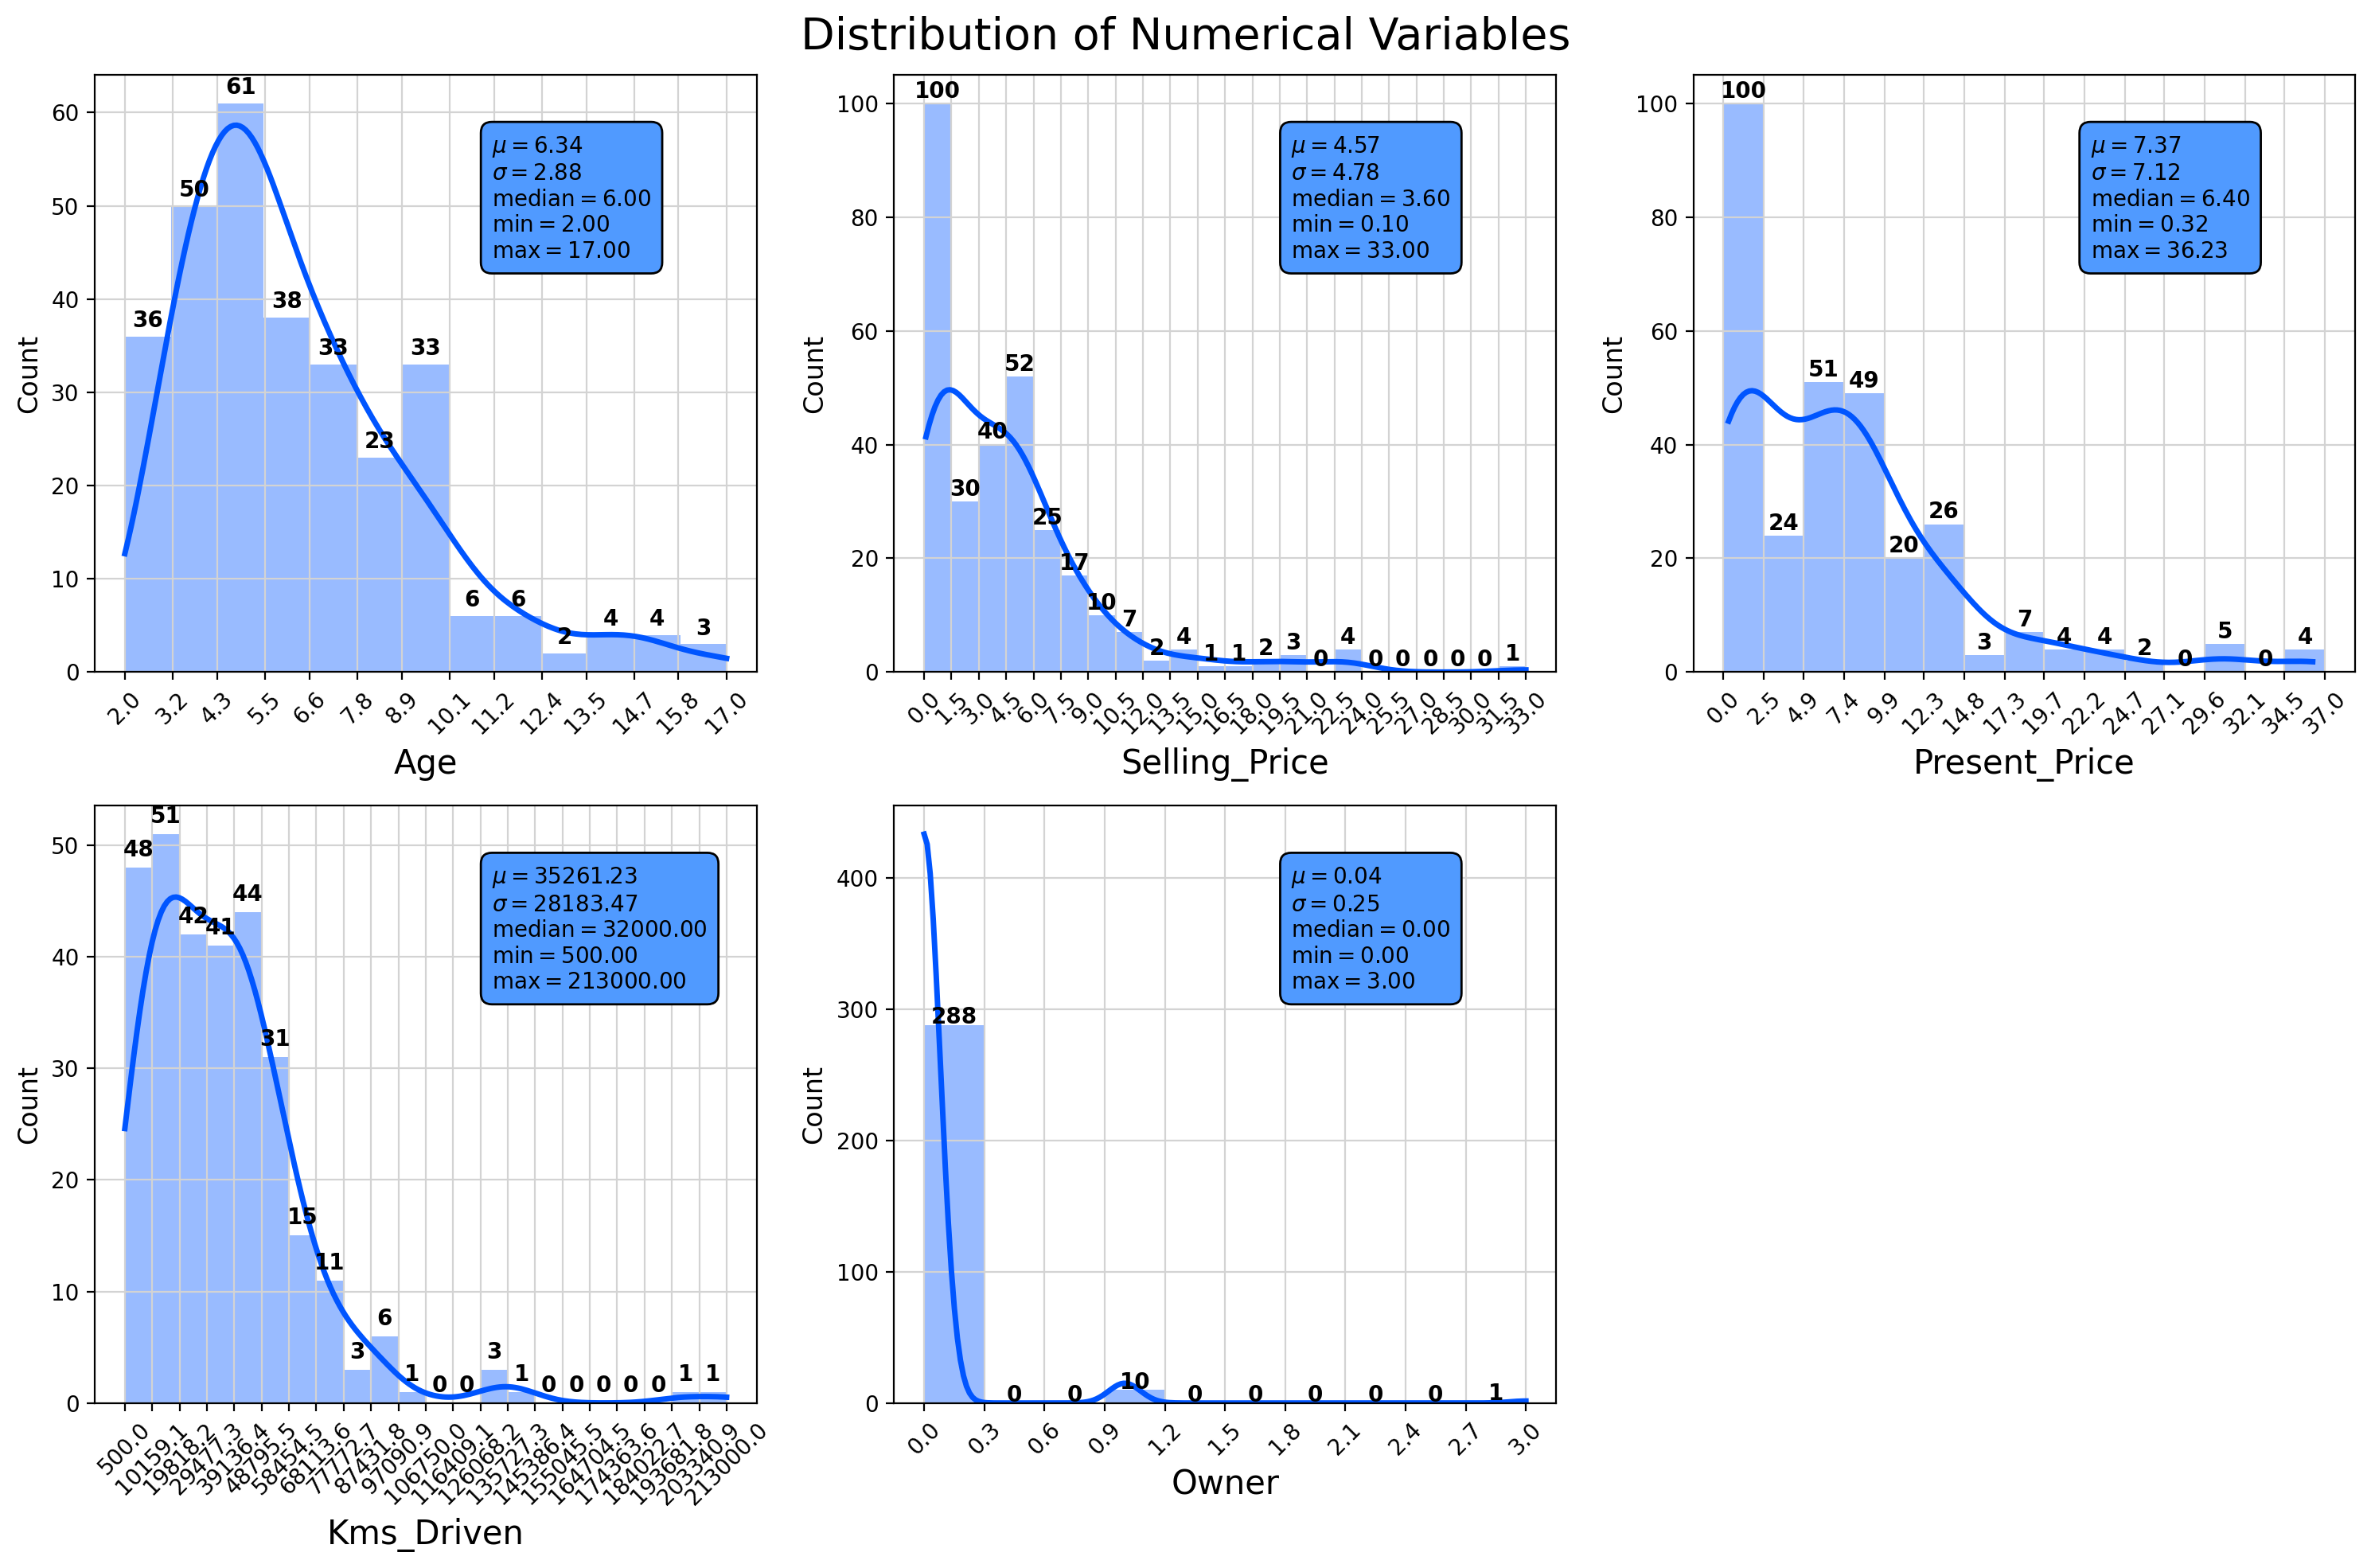

In [46]:
# Calculate NumCols: list of numerical columns
NumCols = df1.select_dtypes(include=['number']).columns.tolist()

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), dpi=200)
c = '#0055ff'

for i, col in enumerate(NumCols):
    row = i // 3
    col_pos = i % 3
    values, bin_edges = np.histogram(
        df1[col],
        bins='auto',
        range=(np.floor(df1[col].min()), np.ceil(df1[col].max()))
    )
    graph = sns.histplot(
        data=df1,
        x=col,
        bins=bin_edges,
        kde=True,
        ax=ax[row, col_pos],
        edgecolor='none',
        color=c,
        alpha=0.4,
        line_kws={'lw': 2.5}
    )
    ax[row, col_pos].set_xlabel(col, fontsize=15)
    ax[row, col_pos].set_ylabel('Count', fontsize=12)
    ax[row, col_pos].set_xticks(np.round(bin_edges, 1))
    ax[row, col_pos].set_xticklabels(ax[row, col_pos].get_xticks(), rotation=45)
    ax[row, col_pos].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[row, col_pos].annotate(
            '{:.0f}'.format(p.get_height()),
            (p.get_x() + p.get_width() / 2, p.get_height() + 1),
            ha='center',
            fontsize=10,
            fontweight='bold'
        )

    # Statistical annotations
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df1[col].mean(),
        r'$\sigma=%.2f$' % df1[col].std(),
        r'$\mathrm{median}=%.2f$' % np.median(df1[col]),
        r'$\mathrm{min}=%.2f$' % df1[col].min(),
        r'$\mathrm{max}=%.2f$' % df1[col].max()
    ))
    ax[row, col_pos].text(
        0.6, 0.9, textstr,
        transform=ax[row, col_pos].transAxes,
        fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#509aff', edgecolor='black', pad=0.5)
    )

# Turn off the extra subplot if there's one
if len(NumCols) < 6:
    ax[-1, -1].axis('off')

# Set the super title for the entire figure
plt.suptitle('Distribution of Numerical Variables', fontsize=20)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


##### **Target VS Numerical Features**

In [47]:
NumCols = df1.select_dtypes(include=['number']).columns.tolist()
NumCols.remove('Selling_Price')
print (f"numerical features: {NumCols}")

numerical features: ['Age', 'Present_Price', 'Kms_Driven', 'Owner']


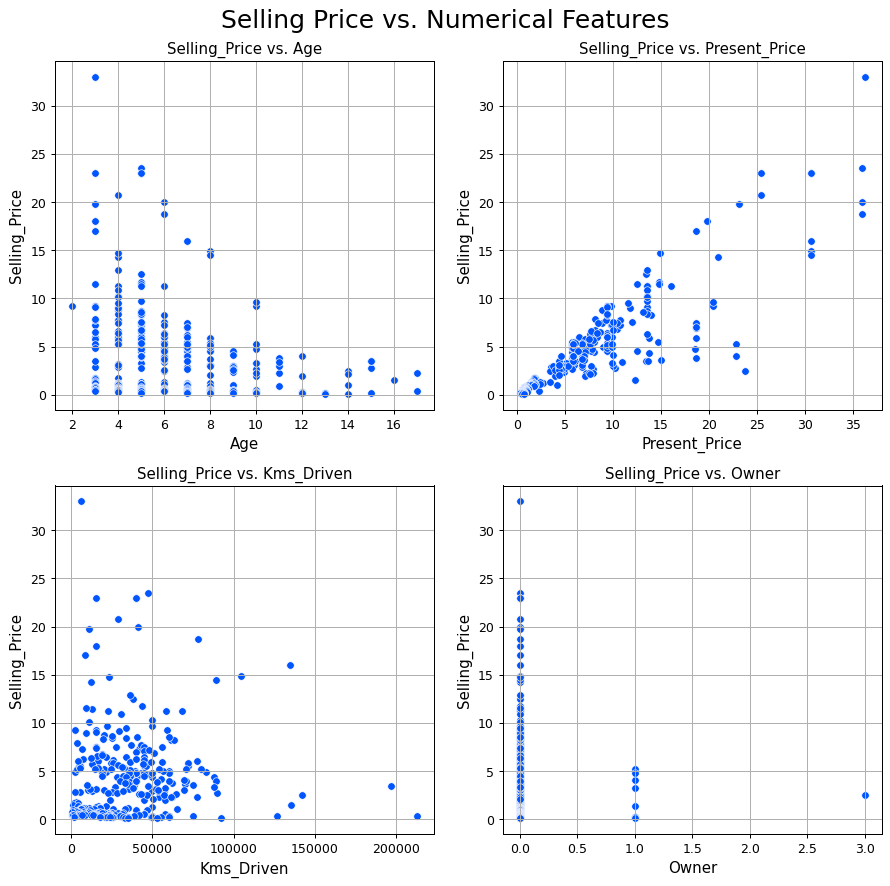

In [48]:
target = 'Selling_Price'
color = '#0055ff'

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), dpi=90)

# Plot each feature vs. target
for i, feature in enumerate(NumCols):
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.scatter(df1[feature], df1[target], color=color, edgecolors='w', linewidths=0.5)
    ax.set_title(f'{target} vs. {feature}', fontsize=12)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel(target, fontsize=12)
    ax.grid(True)

# Adjust layout and show the plot
plt.suptitle('Selling Price vs. Numerical Features', fontsize=20)
plt.tight_layout()
plt.show()


##### **MultiVariate Analysis**

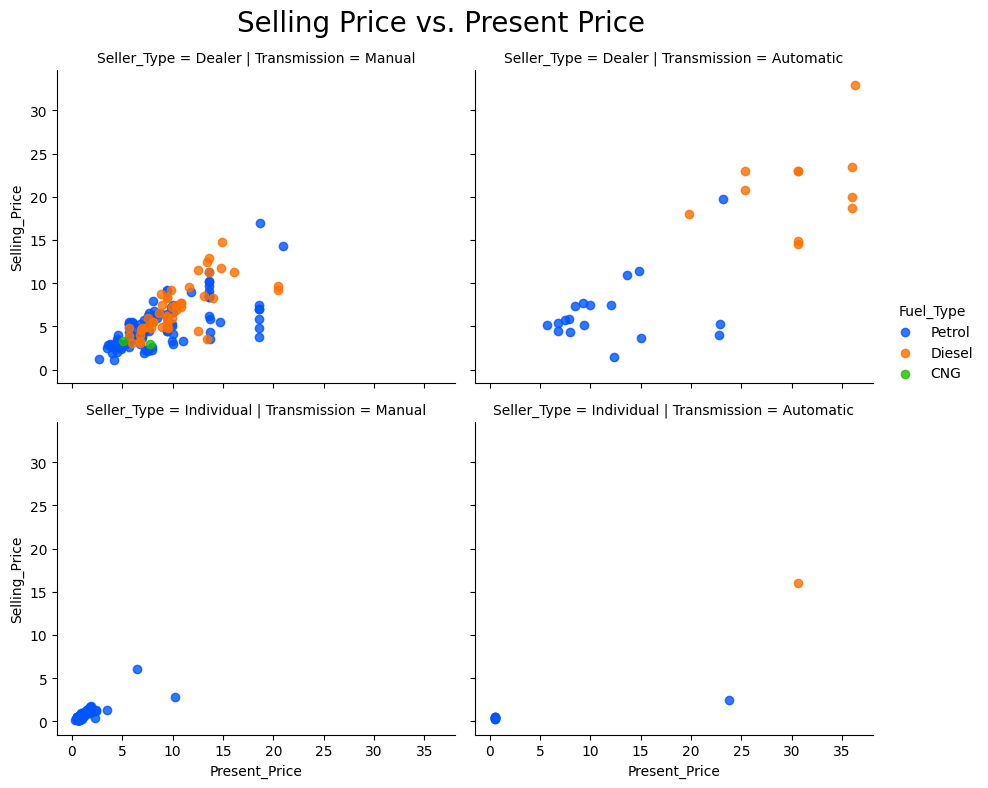

In [49]:


# Example DataFrame creation
# Define custom color palette
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.color_palette(colors)

# Create the lmplot
graph = sns.lmplot(
    x='Present_Price', 
    y='Selling_Price', 
    data=df1, 
    fit_reg=False, 
    row='Seller_Type',
    col='Transmission', 
    hue='Fuel_Type', 
    palette=CustomPalette, 
    height=4, 
    aspect=1
)

# Set the title for the entire figure
plt.suptitle('Selling Price vs. Present Price', fontsize=20)

# Move the legend to a custom position
sns.move_legend(
    graph, 
    loc='lower center', 
    bbox_to_anchor=(1.05, 0.5), 
    ncol=1
)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


##### **Correlations:**

Numerical variables only:

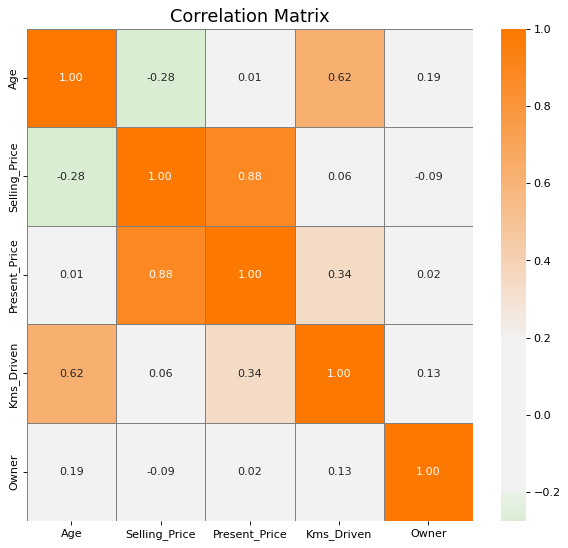

In [50]:
# Define the target variable
target = 'Selling_Price'

# Define a custom colormap
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)

# Select only numeric columns, including the target
numeric_df = df1.select_dtypes(include=['number'])
if target in df1.columns:
    numeric_df[target] = df1[target]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)

# Compute the correlation matrix and plot the heatmap
corr_matrix = numeric_df.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=cmap,
    ax=ax,
    center=0,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray'
)

# Set the title and show the plot
plt.title('Correlation Matrix', fontsize=16)
plt.show()



##### Let's include all features including categorical ones:

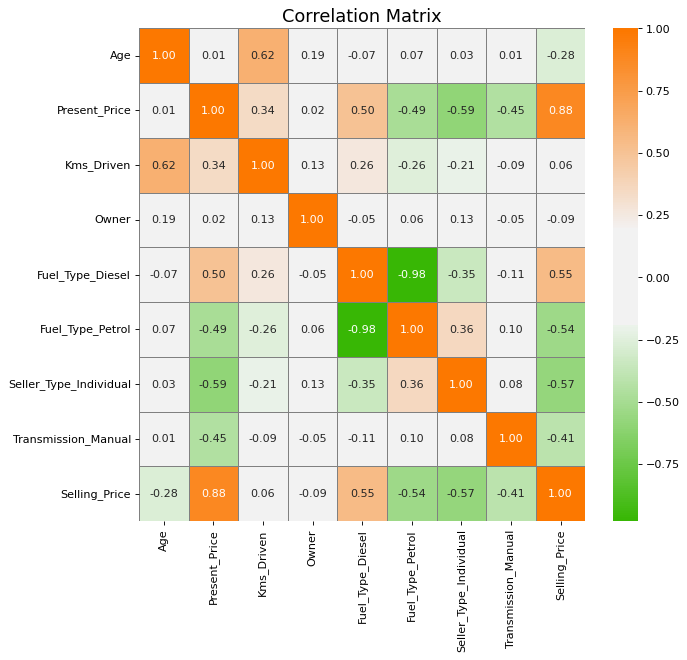

In [51]:

# Define the target variable
target = 'Selling_Price'

# Define a custom colormap
cmap = sns.diverging_palette(125, 28, s=100, l=65, sep=50, as_cmap=True)

# Encode categorical variables using one-hot encoding
encoded_df = pd.get_dummies(df1, drop_first=True)

# Separate target column
if target in encoded_df.columns:
    target_data = encoded_df.pop(target)
    encoded_df[target] = target_data

# Create the figure and axis
fig, ax = plt.subplots(figsize=(9, 8), dpi=80)

# Compute the correlation matrix and plot the heatmap
corr_matrix = encoded_df.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap=cmap,
    ax=ax,
    center=0,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray'
)

# Set the title and show the plot
plt.title('Correlation Matrix', fontsize=16)
plt.show()
